# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [90]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

In [91]:
# Preview dataset
print(display(crops.head()))

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


None


In [92]:
print(f'total row:{crops.shape[0]},total columns:{crops.shape[1]}')

total row:2200,total columns:5


In [93]:
# Check for missing data
crops.isna().sum().sort_values
print('There is no missing values')

There is no missing values


In [94]:
# Check the columns data
crops.info()
#crop is categorical but crrop is the target variable not features so no need to change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [95]:
#find the unique values in crop
print(crops['crop'].unique().tolist())


['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


In [96]:
# Split the data into training and test set (test=0.2 and random seed = 42)
#take note of the order of the splitting
X_train,X_test,y_train,y_test = train_test_split(crops[['N','P','K','ph']],crops['crop'],test_size=0.2,random_state=42)

In [97]:

# Train the logistic regression model for each feature using a for loop to identify which features is important
for feature in ['N', 'P', 'K', 'ph']:
    logreg = LogisticRegression(max_iter=2000, multi_class='multinomial')

    # Fit the model to training data
    logreg.fit(X_train[[feature]], y_train)

    # Predict using the X_test
    y_pred = logreg.predict(X_test[[feature]])

    # Syntax for f1score
    # f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    f1 = f1_score(y_test, y_pred, average="weighted").round(5)
    print(f"F1-score for {feature}: {f1}")


F1-score for N: 0.10508
F1-score for P: 0.10457
F1-score for K: 0.20079
F1-score for ph: 0.04533


In [98]:
# find the correlation between the features
corr = crops[['N','P','K','ph']].corr()
# 1/-1 = perfect correlation(one factor increase/decrease,the other increase/decrease)
#diagonal is always 1 as they are comparing with itself

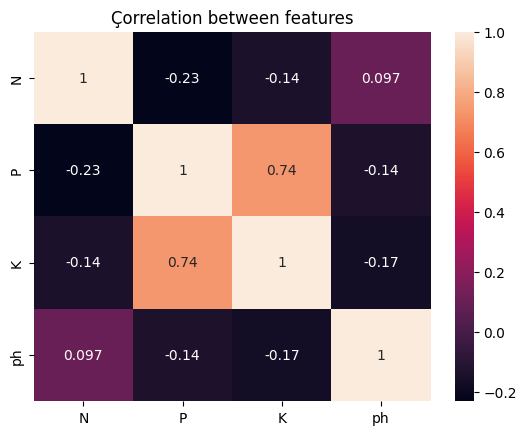

In [99]:
# Create a heatmap for visualization
sns.heatmap(corr, annot=True)
plt.title('Çorrelation between features')
plt.show()
#choose features without high correlation close to 1 or -1 and for the pair with high correlation, choose one of it, in this case is P/K as the coeff is 0.74, drop P as the corrlation P and N is higher compare to K and N
final_features = ['N','K','ph']


In [100]:
# Train the model based on the new features
# Split the data into training and test set (test=0.2 and random seed = 42)
#take note of the order of the splitting
X_train,X_test,y_train,y_test = train_test_split(crops[final_features],crops['crop'],test_size=0.2,random_state=42)
# create model
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')

# Fit the model to training data
log_reg.fit(X_train[final_features], y_train)

# Predict using the X_test
y_pred = log_reg.predict(X_test)

# Syntax for f1score
# f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
model_performance = f1_score(y_test, y_pred, average="weighted")
print(f'F1-score for {final_features}: {model_performance}')

#average=weighted provides a single metric that considers the contribution of each class based on the number of true instances for that class. This is particularly useful when you have imbalanced datasets where some classes 

F1-score for ['N', 'K', 'ph']: 0.558010495235685
